In [1]:
"""
Plot the analytical solution for the Klein Gordon Eq.
in the case of an universe with a ~ t^p like radiation domination
and for V = 1/2*m_a**2*phi**2 with a constant mass.
"""

# coding: utf-8
#from __future__ import division, print_function

import sys, os, time, math
import numpy as np
from numpy import pi, sin, cos, tan, tanh, sqrt, exp, log
from scipy.integrate import odeint
from scipy.constants import G, c, hbar, Boltzmann as kB
import matplotlib.pyplot as plt
from scipy.special import jv, yv, jvp, yvp # first and second bessel functions

In [2]:
# parameter
N = 800 # number of steps
m_a = 1 # axion mass [10^-20 eV] range from paper
# the evolution of phi doent depent on the value of phi_init
phi_init = 1 # [1]
p = 1/2 # radiation dominated
n = (3*p - 1) / 2 # nth bessel function

In [3]:
# scale parameter
# a = a0 * (t/t0)^p
# a_dot = a0 * p / t0 * (t/t0)^(p - 1)
# H = p / t
# A*H(a_osc) = m_a
# A p / t = m_a
# t = A p / m_a
# a_osc / a_i = (t / ti) ^ p = (A p / m_a ti) ^ p
a0 = 1
A = 2
a_osc_prime = 30
# only valid for a ~ t^p
ma_times_ti = A * p / a_osc_prime**(1/p)
t_init = ma_times_ti / m_a
a_osc = a_osc_prime * a0
# t_osc = A * p / m_a
# a_osc2 = a0 * (t_osc / t_init) ** p
a_end = a0 * 1e3
# t_init = 1.0 # inital time [1 / (1e-20 eV)]
t_end = t_init * (a_end / a0)**(1/p)

In [4]:
t = np.logspace(np.log10(t_init), np.log10(t_end), N) # time
a = a0*(t/t_init)**p
a_prime = a / a0 # sclae factor relative to the initial scale factor
a_dot = a0*p/t_init*(t/t_init)**(p - 1)
H = a_dot / a # = p / t

In [5]:
# initial conditions
bessel_arg_init = m_a * t_init
# from psi dot = 0
alpha = (-3/2*p + 1/2) / t_init
A = alpha*jv(n, bessel_arg_init) + m_a*jvp(n, bessel_arg_init)
B = alpha*yv(n, bessel_arg_init) + m_a*yvp(n, bessel_arg_init)

In [6]:
# from psi = f_a * theta
C = a0**(-3/2) * jv(n, bessel_arg_init)
D = a0**(-3/2) * yv(n, bessel_arg_init)

# compute coeffs
det = B*C - A*D
C1 =   B * phi_init / det
C2 = - A * phi_init / det

In [7]:
# compute analytic solution for the axion background field and its time derivative
phi = a**(-3/2) * (t / t_init)**(1/2) * (C1*jv(n, m_a * t) + C2*yv(n, m_a * t))
kappa = a0**(-3/2) / t_init**(-3/2*p + 1/2)
phi_dot = kappa * ((-3/2*p + 1/2)*t**(-3/2*p - 1/2)*(C1*jv(n, m_a * t) + C2*yv(n, m_a * t)) + \
                   t**(-3/2*p + 1/2) * m_a * (C1*jvp(n, m_a * t) + C2*yvp(n, m_a * t)))

In [8]:
# compute density and related quantities
rho_a = 1/2*phi_dot**2 + 1/2*m_a**2*phi**2 # denity
P_a = 1/2*phi_dot**2 - 1/2*m_a**2*phi**2 # pressure
w_a = P_a / rho_a # eq. of state
rho_c = 3 * H**2 / (8*pi*G) # critical density
density_parameter = rho_a / rho_c

In [9]:
# approximate the density when the axion field is oscillating
osc_index = np.where(a >= a_osc)[0][0] # find the index where a > a_osc for the first time
rho_a_osc = rho_a[osc_index]
valid_a = a[osc_index:]
rho_a_approx = rho_a_osc * (a_osc / valid_a)**3

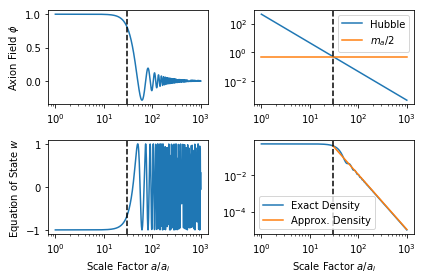

In [10]:
# plot all the stuff
# field
plt.subplot(2, 2, 1)
plt.semilogx(a_prime, phi)
plt.ylabel(r"Axion Field $\phi$")
# TODO: plot the a_osc position using a vertical dashed line
plt.axvline(a_osc, linestyle="--", color="black")

# mass vs hubble
plt.subplot(2, 2, 2)
plt.loglog(a_prime, H, label="Hubble")
# plt.loglog(a_prime, p / t, label="Hubble formula")
plt.loglog(a_prime, np.ones(a_prime.size) * m_a / 2, label=r"$m_a / 2$")
plt.legend()
plt.axvline(a_osc, linestyle="--", color="black")

# eos
plt.subplot(2, 2, 3)
plt.semilogx(a_prime, w_a)
plt.ylabel("Equation of State $w$")
plt.xlabel("Scale Factor $a / a_i$")
plt.axvline(a_osc, linestyle="--", color="black")

# density
plt.subplot(2, 2, 4)
plt.loglog(a_prime, rho_a, label="Exact Density")
plt.loglog(valid_a / a0, rho_a_approx, label="Approx. Density")
plt.xlabel("Scale Factor $a / a_i$")
plt.legend()
plt.axvline(a_osc, linestyle="--", color="black")

plt.tight_layout()
plt.savefig("Plots/analytic_power_law_plot.pdf")
# TODO: rescale phi to correct units